# Exercise: preparing a mask topography

In [7]:
using Makie, CairoMakie, GeoMakie
using DIVAnd
using Statistics
include("../../config.jl")

"https://dox.uliege.be/index.php/s/h8d3pyqmuea6J9H/download"

## Set parameters

In [8]:
dx = dy = 0.25
lonr = 27:dx:42.
latr = 40:dy:48

40.0:0.25:48.0

## Load file

In [9]:
bathname = gebco08file
download_check(gebco08file, gebco08fileURL)
bathisglobal = true

[ Info: File already downloaded


true

## Extract bathymetry

In [10]:
bx,by,b = DIVAnd.extract_bath(bathname,bathisglobal,lonr,latr);

## Create mask

In [11]:
depthr = [0, 150, 500, 1000]
mask = falses(size(b,1),size(b,2),length(depthr))

for k = 1:length(depthr)
    for j = 1:size(b,2)
        for i = 1:size(b,1)
            mask[i,j,k] = b[i,j] >= depthr[k]
        end
    end
end

## Plot mask

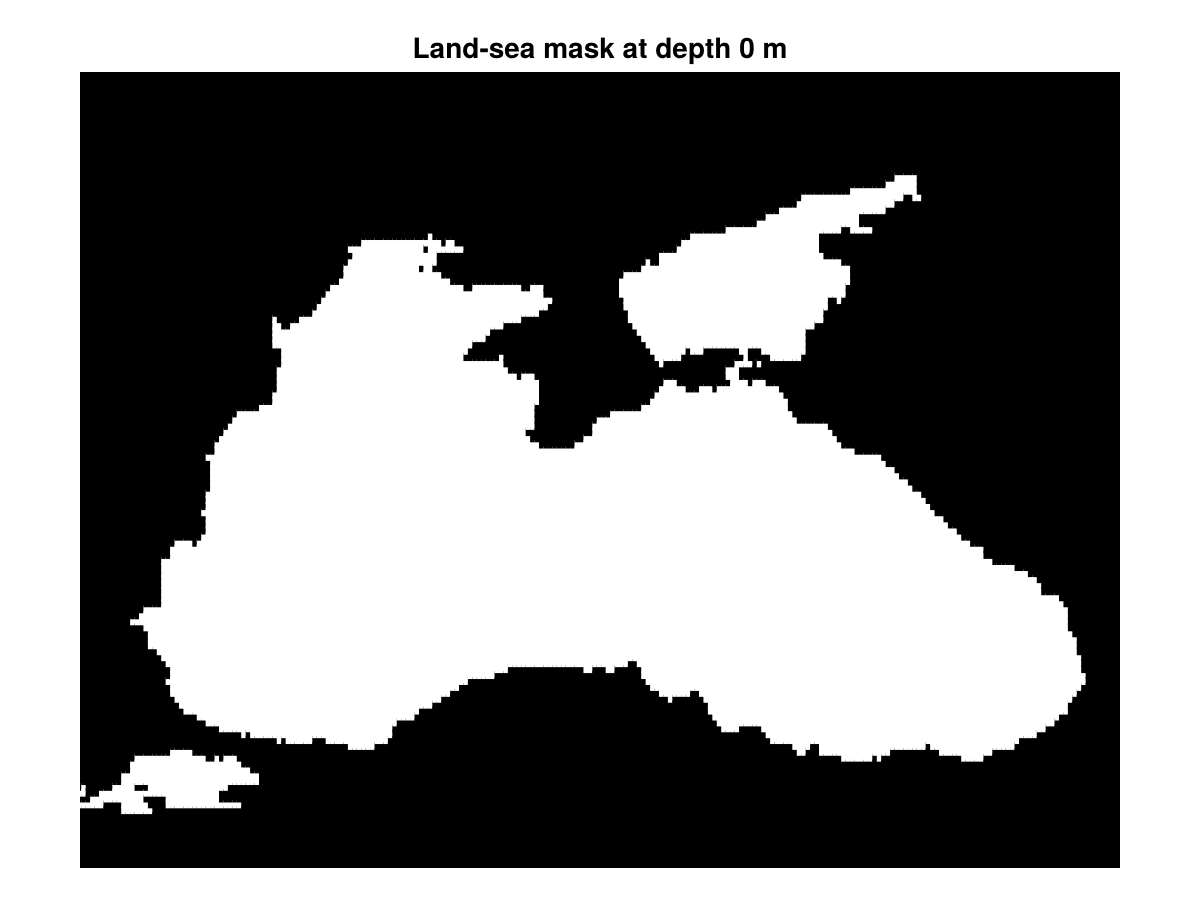

In [12]:
plot_mask(bx, by, mask[:,:,1], depth=depthr[1])

## Edit mask
Mask out Sea of Azov and Sea of Marmara

In [13]:
mask_copy = copy(mask);
sel_lon1 = (bx.>34.75);
sel_lat1 = (by.>45.10);
mask_copy[sel_lon1, sel_lat1,1] .= false;
sel_lon2 = (bx.<29.5);
sel_lat2 = (by.<41.125)
mask_copy[sel_lon2, sel_lat2,1] .=false;

## Make a plot

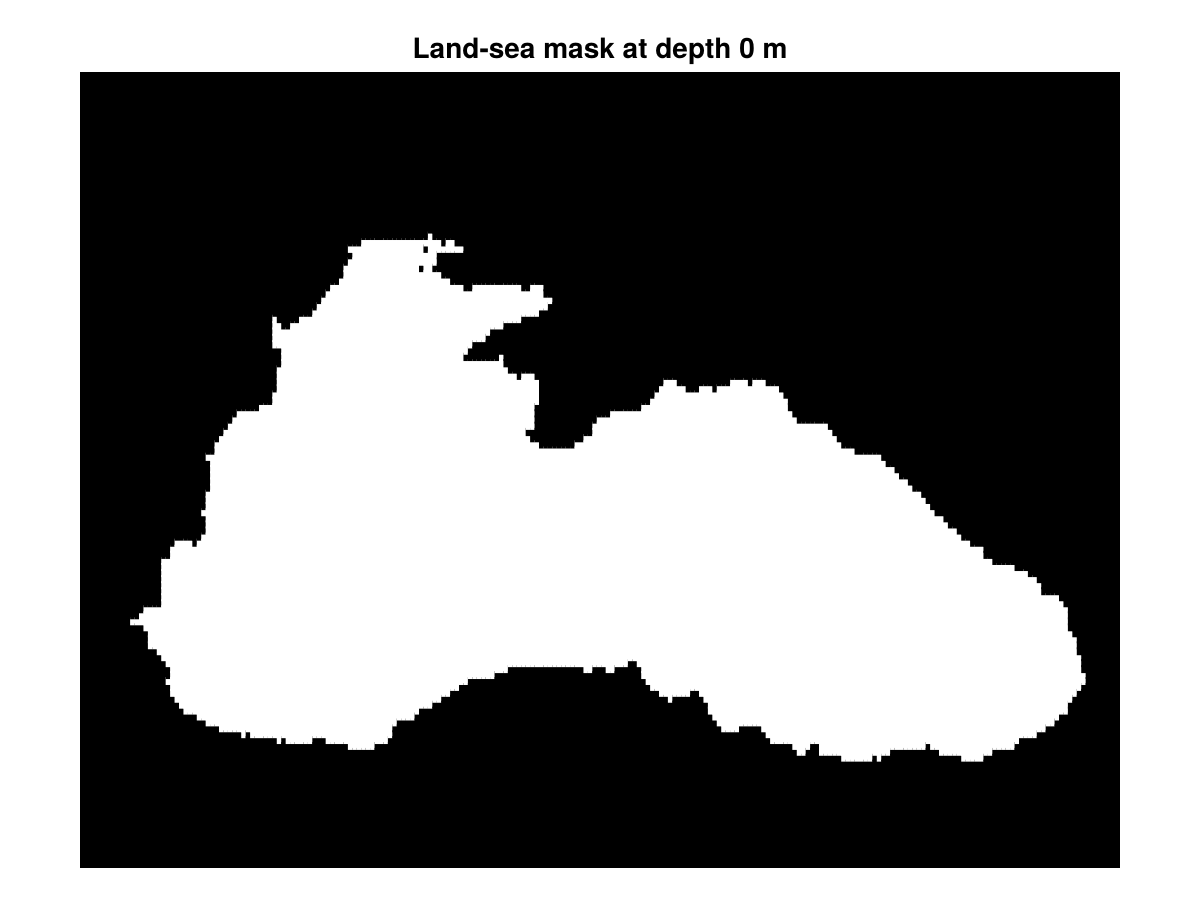

In [14]:
plot_mask(bx, by, mask_copy[:,:,1], depth=depthr[1])